# - The Project :: Oil Price Regressoion
********************************************

<img src="images/iot.jpg" />

* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

* Describtion of project ::
    *************************
* That Project disscuss one of the Most common problem that cosider the Oil cooperate, which help all oil company to forecast the oil preice in the future based on the historical price of oil.
<img src="images/IOT.png" />         
* Data :: 
     * We Have data belongings to Oil Prices Which Present The Behaviour of the oil Prices every years. 
     * We Have dataset from a oil company. The data contains information about almost eight thousand record of oil price Based on the years .
     * We Must Known That  Task of pridect the price of the oil its more difficult becouse oile price nmore changable .
* Tasks ::
     * *Apply EDA Technice To* :: Describe The Behavior of the data For Extractng Meaningfull Knowledge , insights and Vision From That data To Make The Steckholders of our Business Make More Efficient Decision Which improve and develop The Business
     * Research Of dependences and Formulation of Hypothess.
     * Built ML Model For Predciting New_Values Of Oil-Price.
     * Get High Accuracy From the Model Performance To improve Our Business .
        
<img src="images/Process.png" />

* Import Requried liberaries ::

In [1]:
import numpy     as np
import pandas    as pd
import seaborn   as sns
import datasist  as ds
import warnings  as w
import missingno as mno
import pandas_profiling  as pp
import matplotlib.pyplot as plt


* Set Some Instructions ::

In [2]:
%matplotlib inline
w.filterwarnings("ignore")
sns.set(rc = {"figure.figsize" : [10 , 20]} , font_scale = 1.7)

In [3]:
# loading data ::
df = pd.read_csv("IOT-temp.csv")
df

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
***************************
*  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [4]:
df.columns

Index(['id', 'room_id/id', 'noted_date', 'temp', 'out/in'], dtype='object')

In [5]:
df.dtypes

id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [7]:
# Casting the dtype of Date from object into Datetime dtype
df["noted_date"] = pd.to_datetime(df["noted_date"] , errors= "coerce")
df[["noted_date"]]

,noted_date
0,2018-08-12 09:30:00
1,2018-08-12 09:30:00
2,2018-08-12 09:29:00
3,2018-08-12 09:29:00
4,2018-08-12 09:29:00
...,...
97601,2018-07-28 07:07:00
97602,2018-07-28 07:07:00
97603,2018-07-28 07:06:00
97604,2018-07-28 07:06:00


In [8]:
df.dtypes

id                    object
room_id/id            object
noted_date    datetime64[ns]
temp                   int64
out/in                object
dtype: object

In [9]:
# Apply Feature enginerring techniqe to generate new features
df["Years"]  = df["noted_date"].dt.year  
df["Moth"]   = df["noted_date"].dt.month
df["Day"]    = df["noted_date"].dt.day

In [10]:
# present statistical describtion of numerical data
df.describe(include = ["number"])

,temp,Years,Moth,Day
count,97606.000000,97606.0,97606.000000,97606.000000
mean,35.053931,2018.0,9.140719,14.500902
std,5.699825,0.0,2.493387,5.949026
min,21.000000,2018.0,1.000000,8.000000
25%,30.000000,2018.0,9.000000,9.000000
50%,35.000000,2018.0,10.000000,12.000000
75%,40.000000,2018.0,10.000000,17.000000
max,51.000000,2018.0,12.000000,31.000000


In [11]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (id)

The Col _ (id) _Unique_values :: ['__export__.temp_log_196134_bd201015'
 '__export__.temp_log_196131_7bca51bc'
 '__export__.temp_log_196127_522915e3' ...
 '__export__.temp_log_100386_84093a68'
 '__export__.temp_log_123297_4d8e690b'
 '__export__.temp_log_133741_32958703']

The Col _ (id)_Value_counts :: 

__export__.temp_log_196108_4a983c7e    2
__export__.temp_log_126917_2290a24c    1
__export__.temp_log_48053_60c6b848     1
__export__.temp_log_164559_3b60c33f    1
__export__.temp_log_91437_9eb2f466     1
                                      ..
__export__.temp_log_179745_32980482    1
__export__.temp_log_150265_adec0f75    1
__export__.temp_log_147993_7e038573    1
__export__.temp_log_70564_cbcab363     1
__export__.temp_log_152217_a35d36ef    1
Name: id, Length: 97605, dtype: int64

-----------
-----------

The Col :: (room_id/id)

The Col _ (room_id/id) _Unique_values :: ['Room Admin']

The Col _ (room_id/id)_Value_counts :: 

Room Admin    97606
Name: room_id/id, d

In [12]:
df[df["temp"] == df["temp"].max()]

,id,room_id/id,noted_date,temp,out/in,Years,Moth,Day
52557,__export__.temp_log_36405_139a524d,Room Admin,2018-09-30 17:29:00,51,Out,2018,9,30
52563,__export__.temp_log_36382_f6ec793e,Room Admin,2018-09-30 17:13:00,51,Out,2018,9,30


In [13]:
df[df["temp"] == df["temp"].min()]

,id,room_id/id,noted_date,temp,out/in,Years,Moth,Day
5759,__export__.temp_log_177075_1afebd80,Room Admin,2018-03-12 11:02:00,21,In,2018,3,12
5760,__export__.temp_log_177074_72ce2c39,Room Admin,2018-03-12 11:02:00,21,In,2018,3,12


In [14]:
df.groupby("out/in").describe()["temp"]

,count,mean,std,min,25%,50%,75%,max
out/in,,,,,,,,
In,20345.0,30.453920,2.238101,21.0,29.0,31.0,32.0,41.0
Out,77261.0,36.265244,5.717055,24.0,31.0,37.0,40.0,51.0


In [15]:
Con_Matrix = df.corr()
Con_Matrix

,temp,Years,Moth,Day
temp,1.000000,NaN,0.037074,0.614699
Years,NaN,NaN,NaN,NaN
Moth,0.037074,NaN,1.000000,0.205148
Day,0.614699,NaN,0.205148,1.000000


<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process :
***********************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.


Text(0.5, 1.0, 'Confusion_Matrix of data')

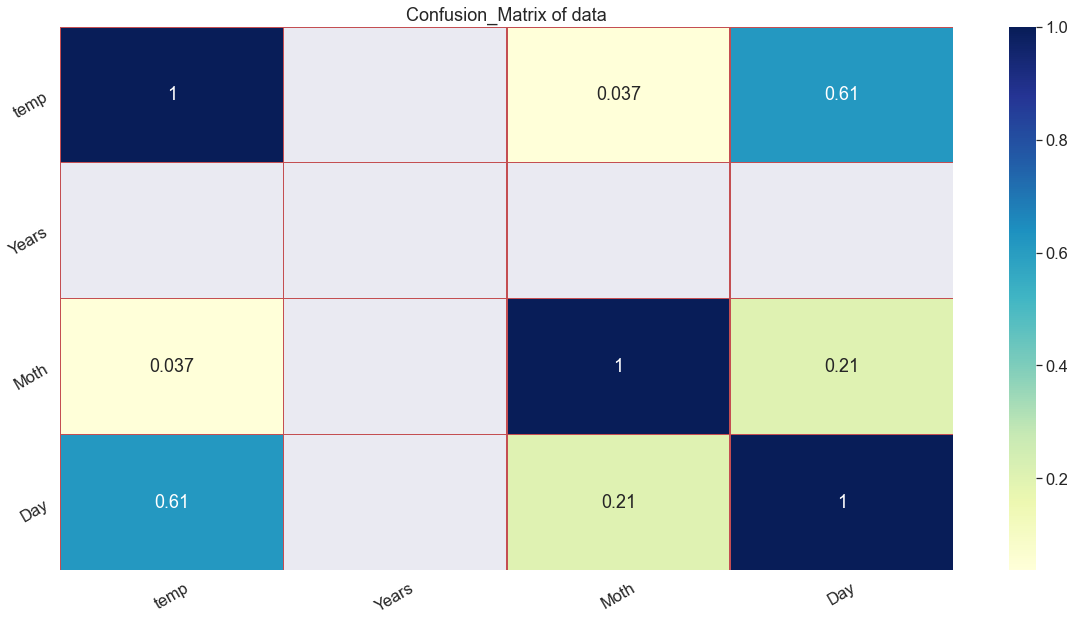

In [16]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [20 , 10]} , font_scale=1.5)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

<AxesSubplot:xlabel='temp'>

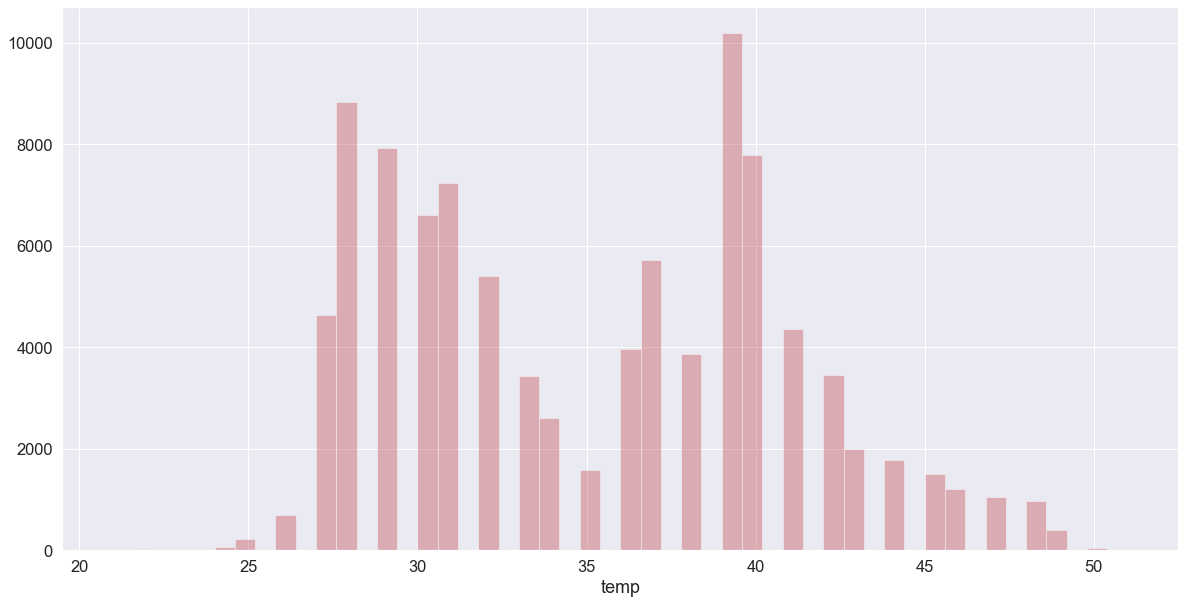

In [17]:
# identify The Oil Price distribution 
sns.distplot(df["temp"] , kde=False , color="r")

<AxesSubplot:xlabel='temp', ylabel='Density'>

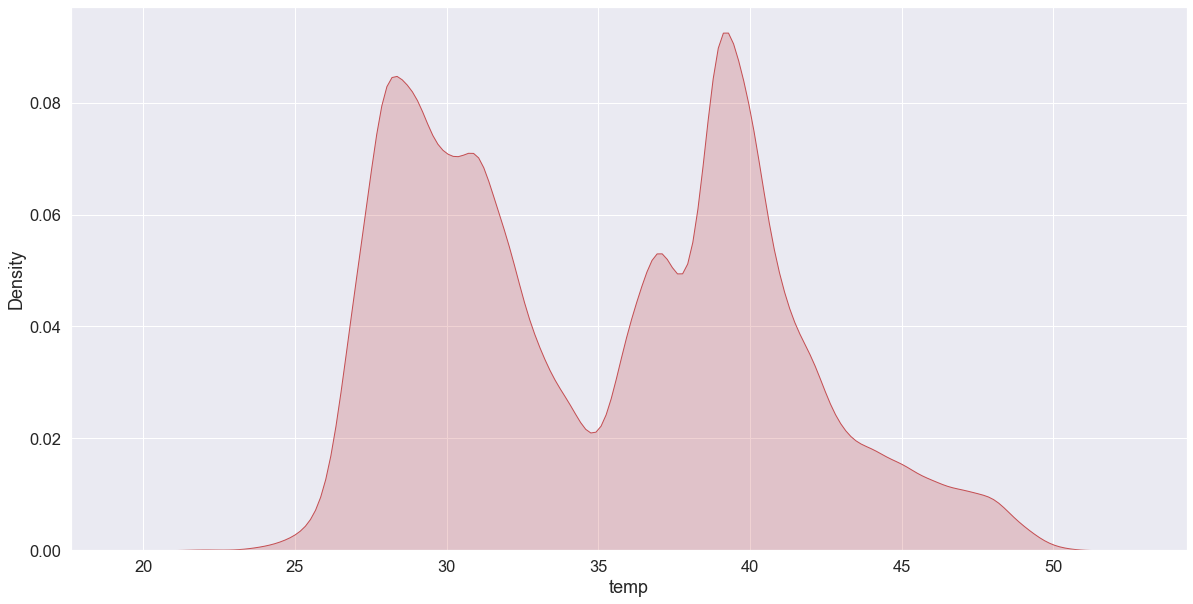

In [18]:
sns.kdeplot(df["temp"] , shade=True , color="r")

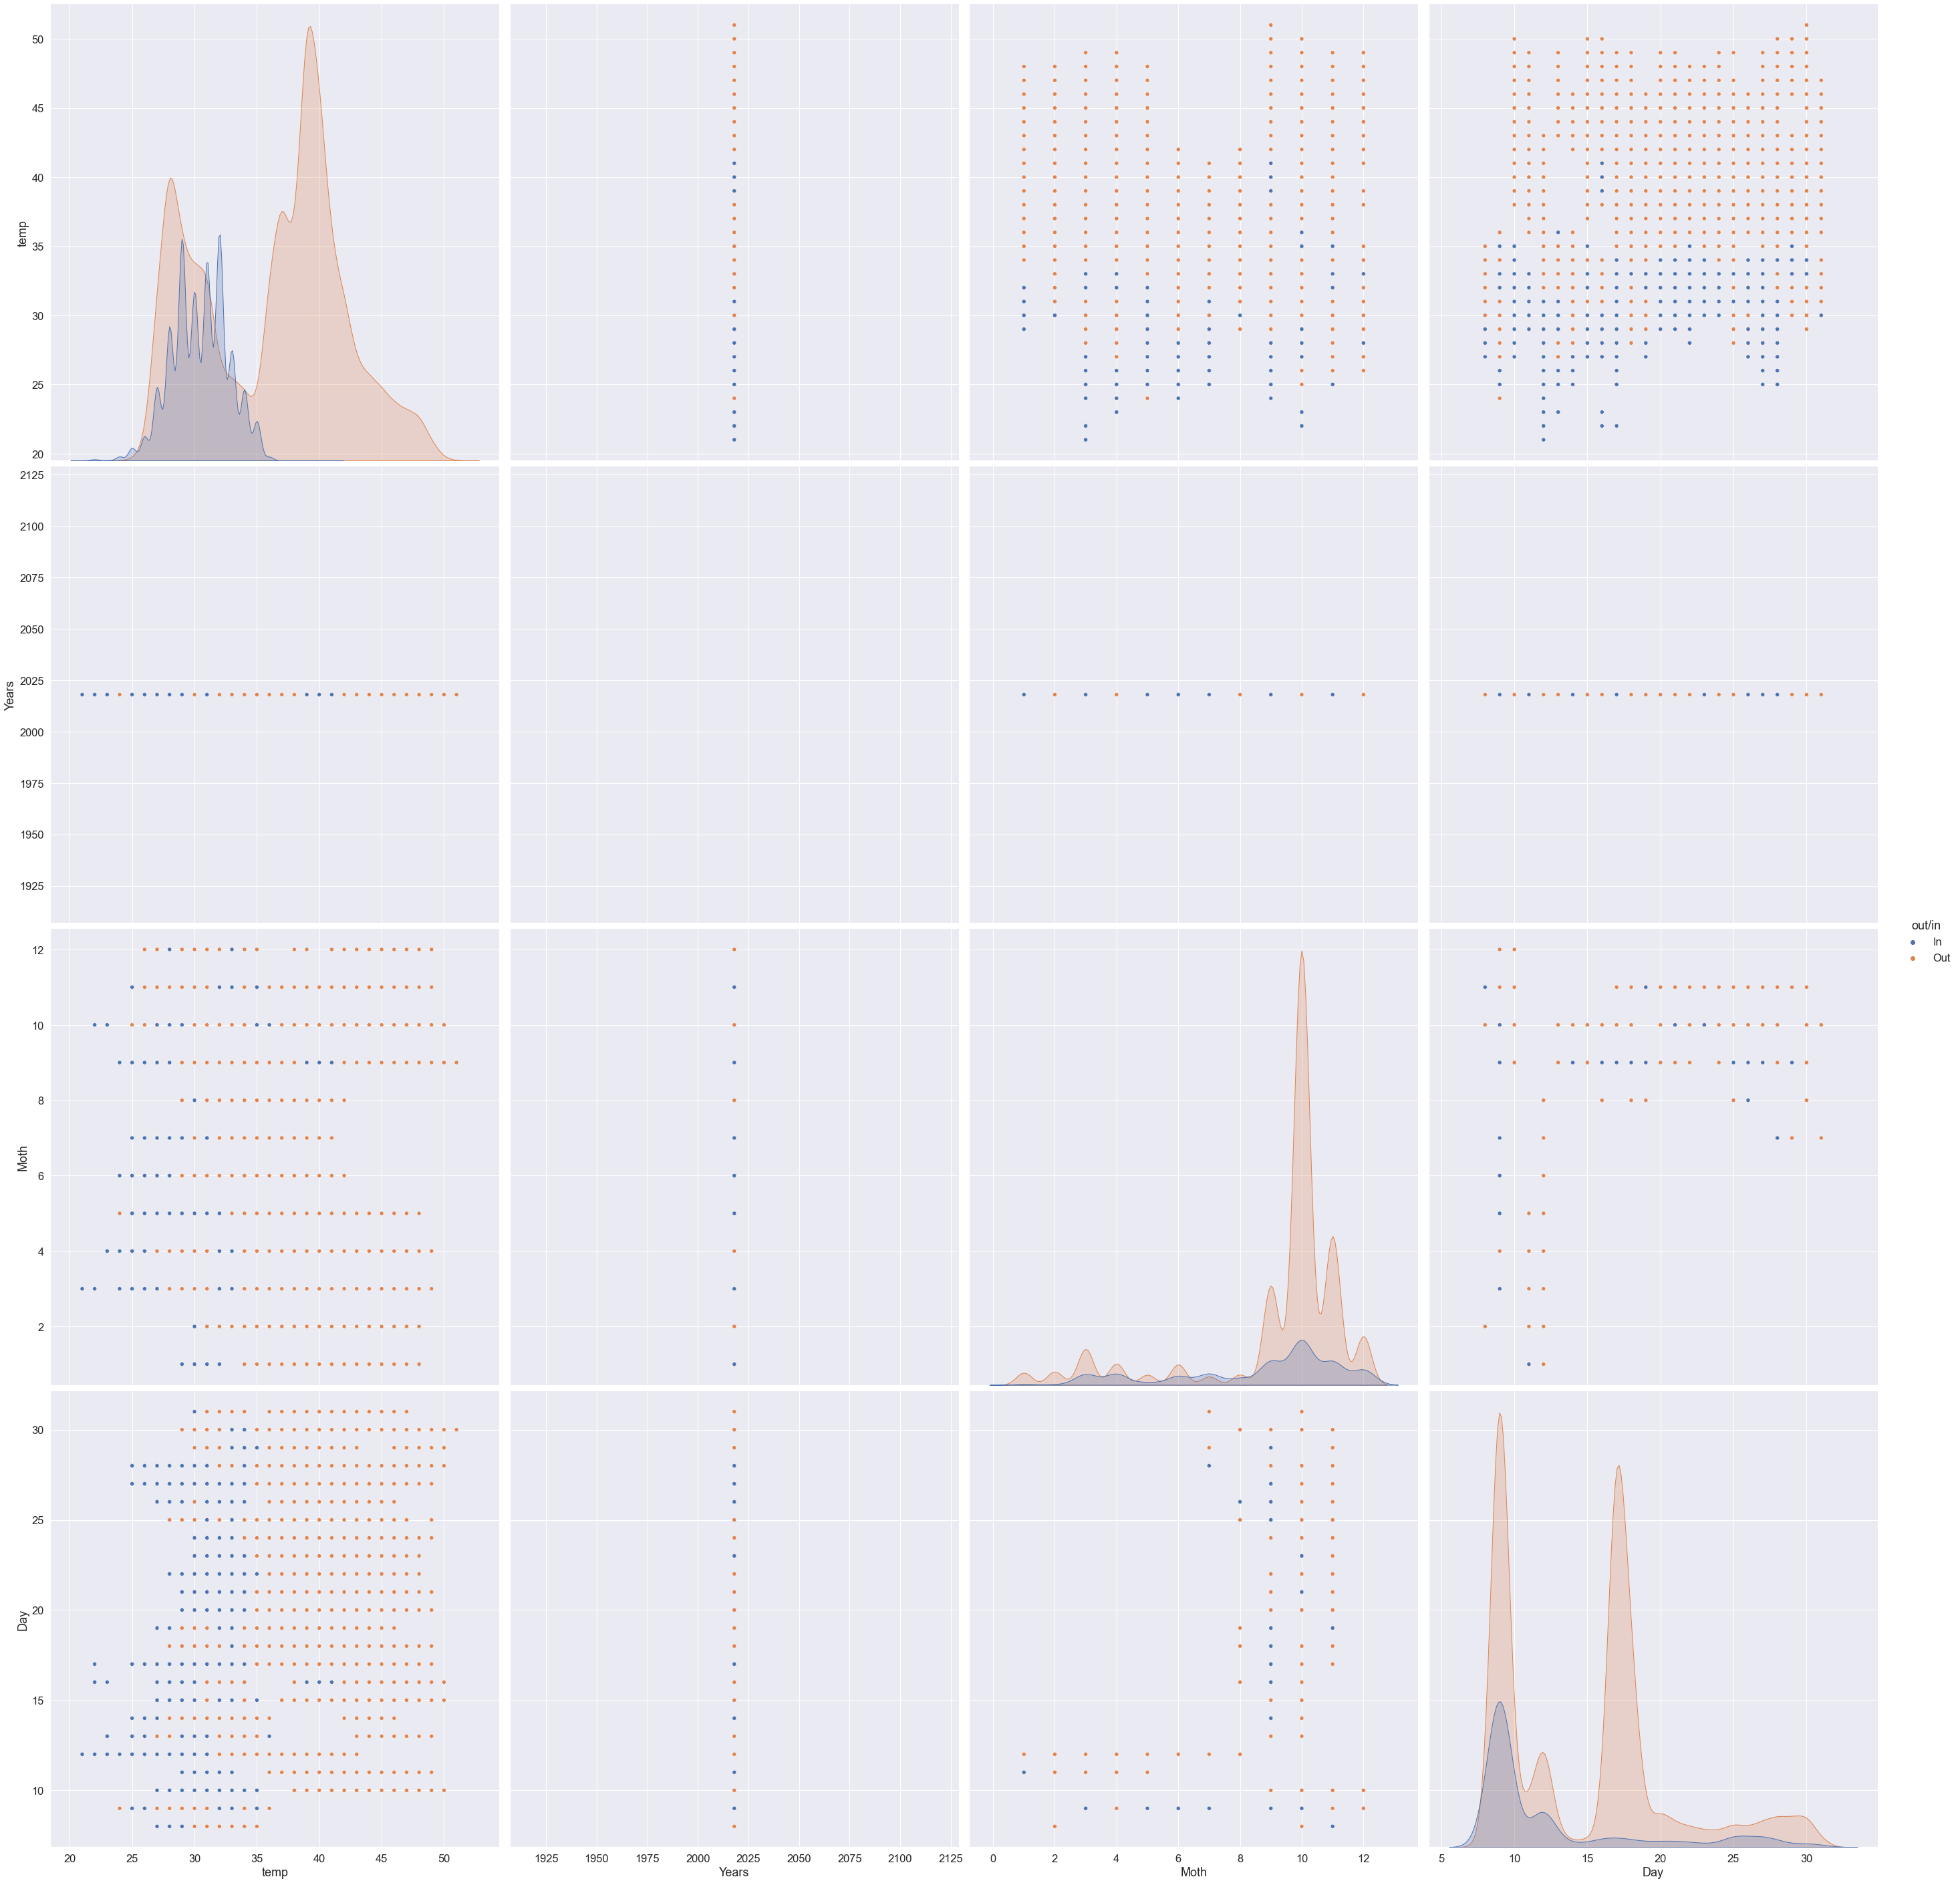

In [19]:
sns.pairplot(df , hue= "out/in" , height=10 )

<AxesSubplot:ylabel='temp'>

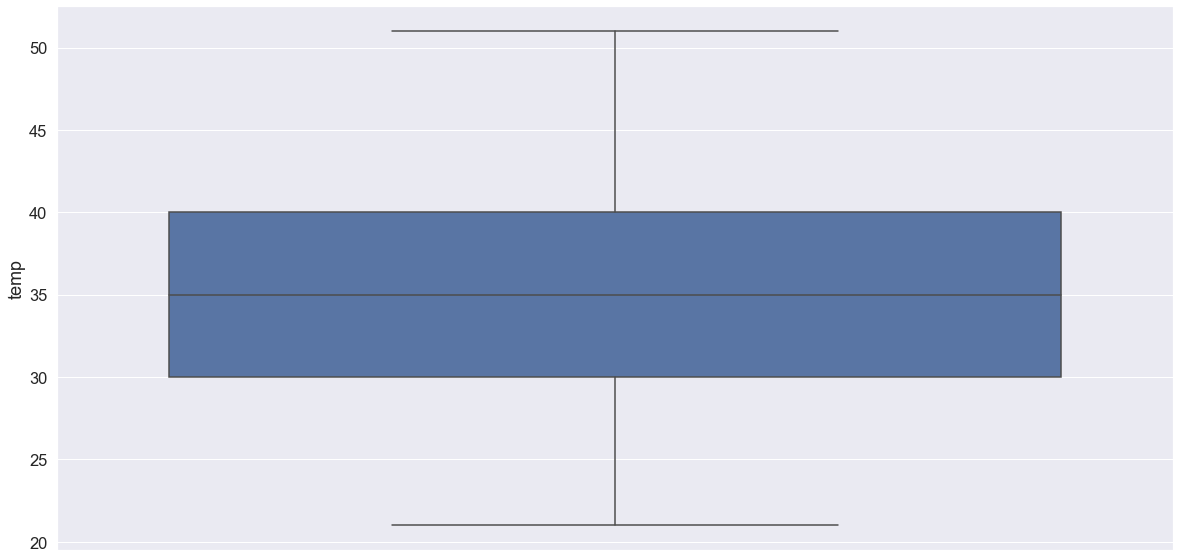

In [20]:
sns.boxplot(y = "temp" , data = df)

<AxesSubplot:ylabel='temp'>

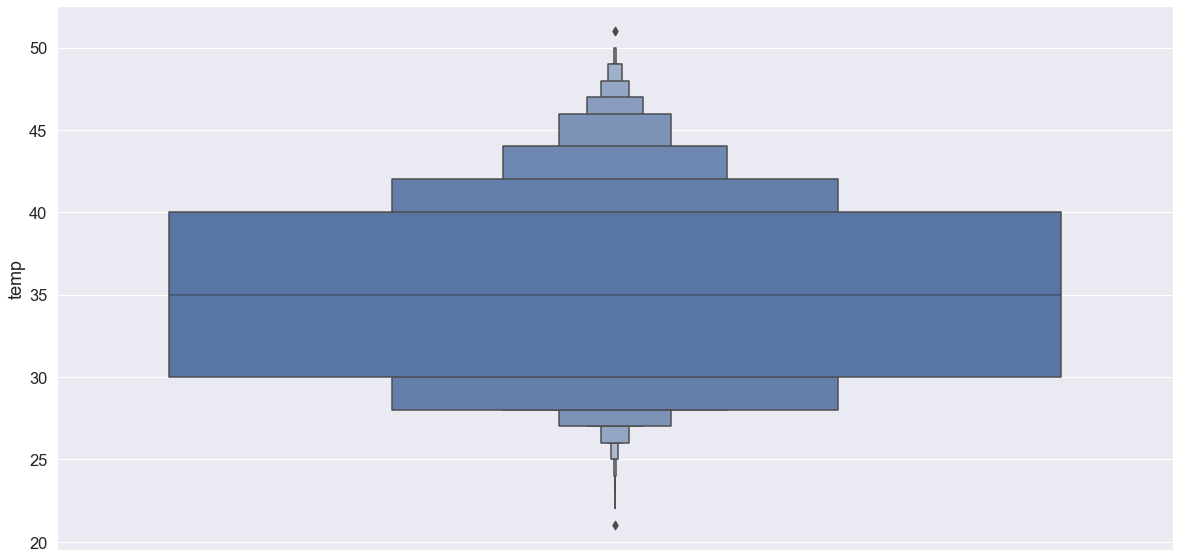

In [21]:
sns.boxenplot(y = "temp" , data = df)

<AxesSubplot:ylabel='temp'>

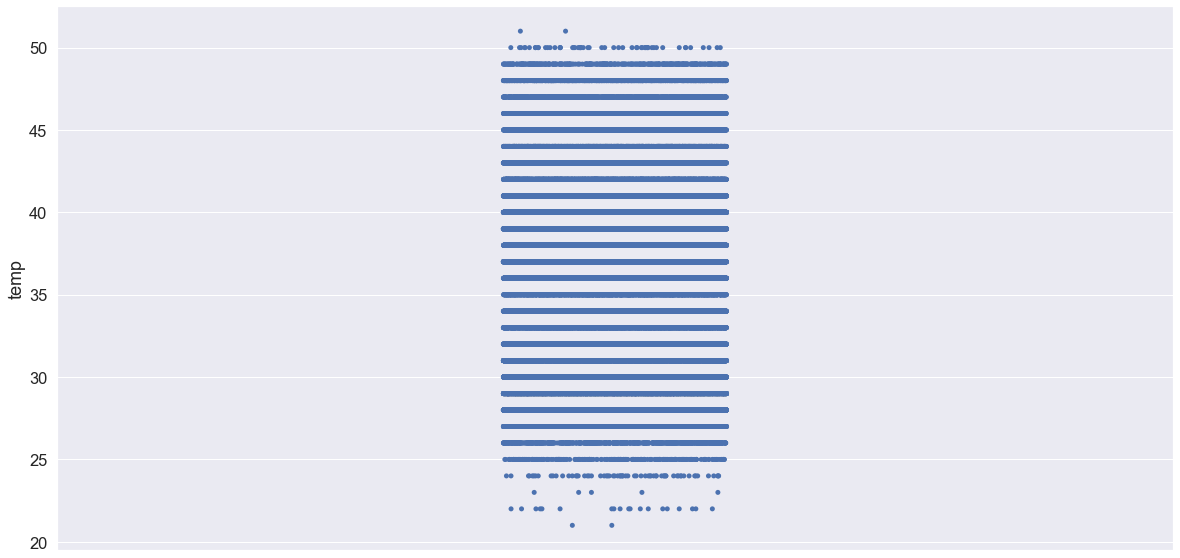

In [22]:
sns.stripplot(y = "temp" , data = df )

<AxesSubplot:ylabel='temp'>

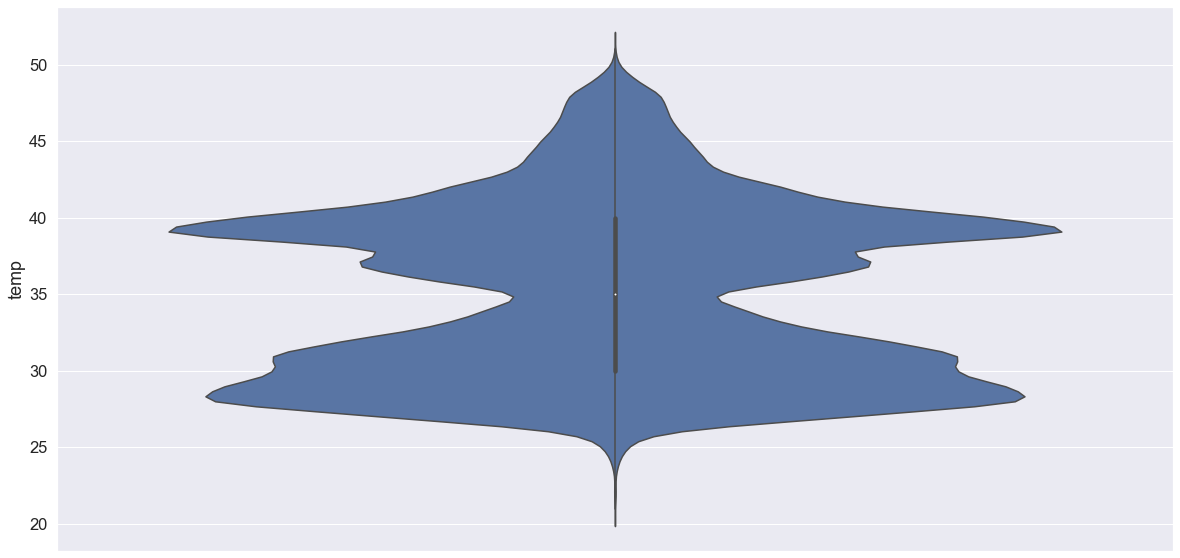

In [23]:
sns.violinplot(y = "temp" , data = df)

<AxesSubplot:ylabel='temp'>

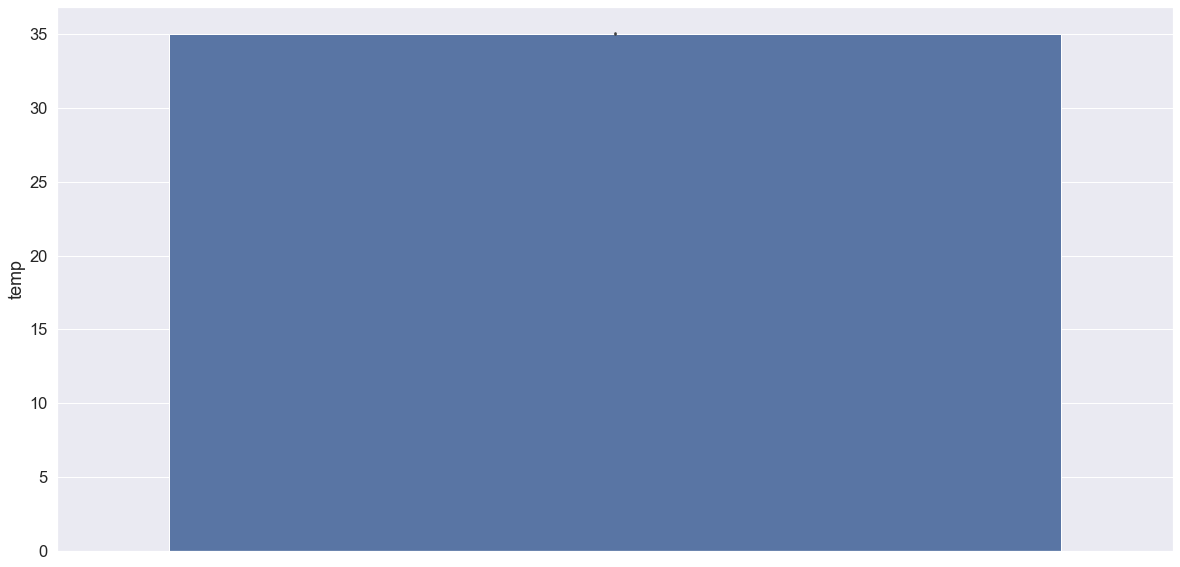

In [24]:
sns.barplot(y = "temp" , data = df )

In [25]:
df["Years"].value_counts()

2018    97606
Name: Years, dtype: int64

(array([0]), [Text(0, 0, '2018')])

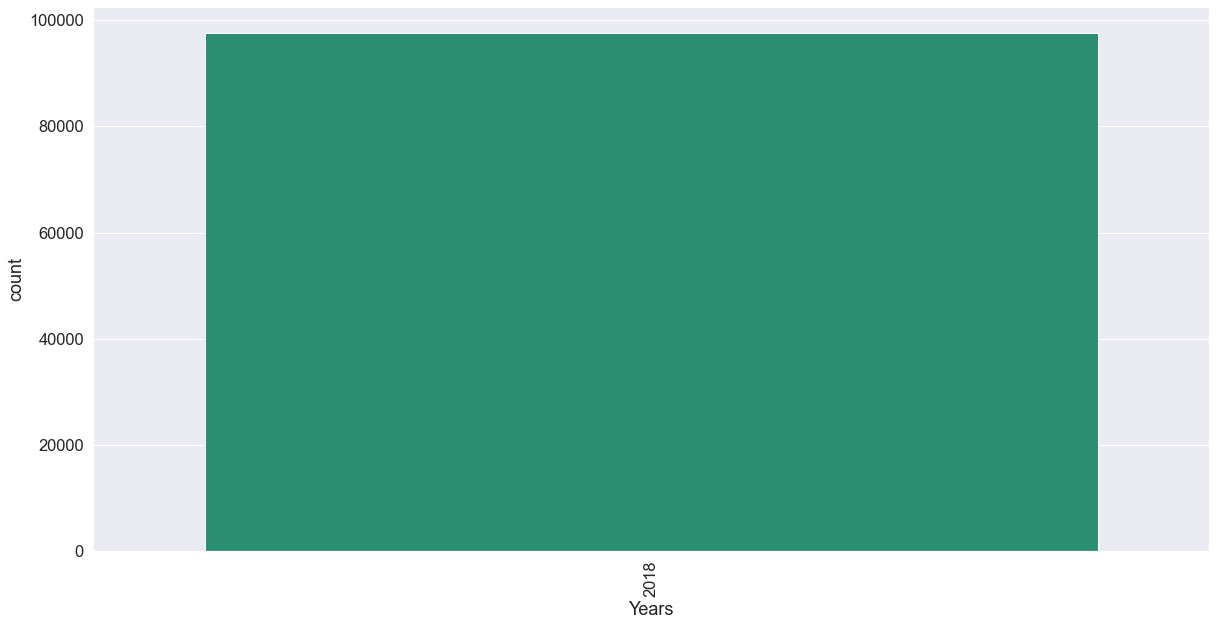

In [26]:
sns.countplot( "Years" , data = df , palette="Dark2")
plt.xticks(rotation = 90)

In [27]:
df["Moth"].value_counts()

10    44651
11    16269
9     11892
12     6298
3      4579
4      3334
6      2976
7      2181
8      1764
2      1250
5      1224
1      1188
Name: Moth, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

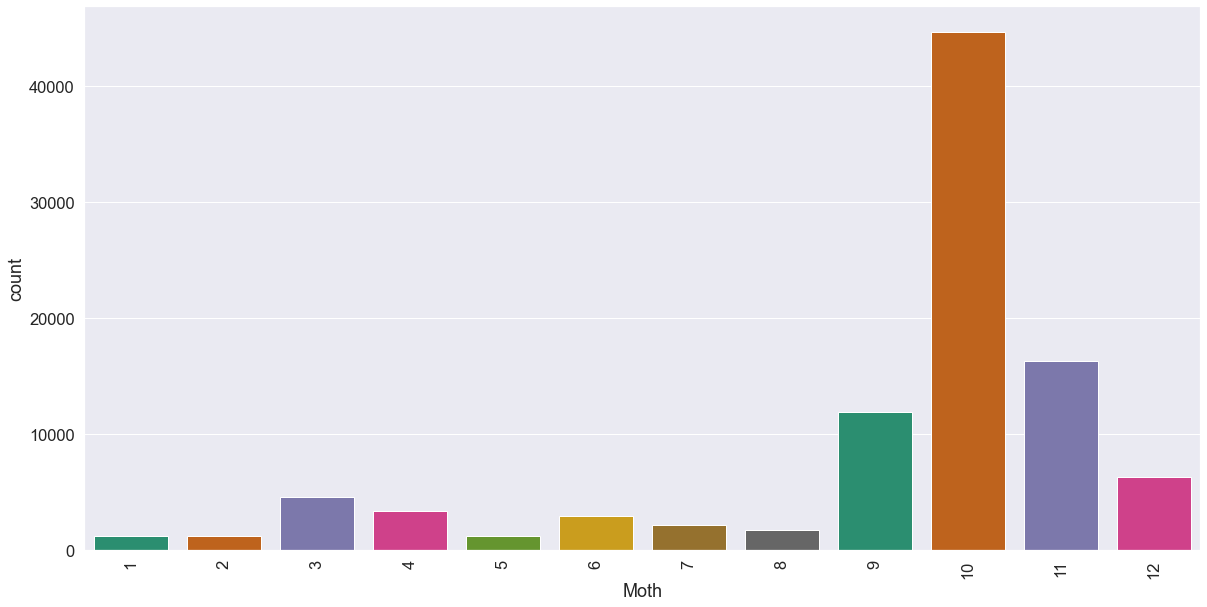

In [28]:
sns.countplot( "Moth" , data = df , palette="Dark2")
plt.xticks(rotation = 90)

In [29]:
df["Day"].value_counts()

9     37261
17    21083
18     8175
12     7612
11     2181
10     1807
20     1782
27     1569
28     1565
25     1559
30     1544
29     1282
21     1244
26     1164
8      1083
22     1058
19     1012
16      911
23      849
24      768
13      742
15      509
31      444
14      402
Name: Day, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '8'),
  Text(1, 0, '9'),
  Text(2, 0, '10'),
  Text(3, 0, '11'),
  Text(4, 0, '12'),
  Text(5, 0, '13'),
  Text(6, 0, '14'),
  Text(7, 0, '15'),
  Text(8, 0, '16'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '20'),
  Text(13, 0, '21'),
  Text(14, 0, '22'),
  Text(15, 0, '23'),
  Text(16, 0, '24'),
  Text(17, 0, '25'),
  Text(18, 0, '26'),
  Text(19, 0, '27'),
  Text(20, 0, '28'),
  Text(21, 0, '29'),
  Text(22, 0, '30'),
  Text(23, 0, '31')])

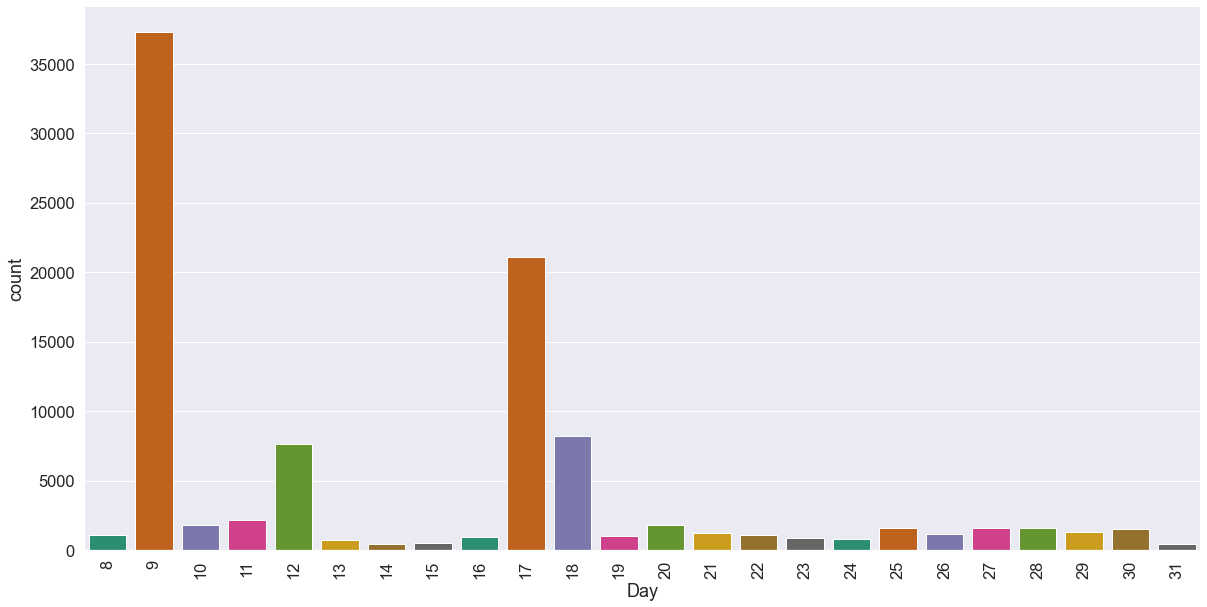

In [30]:
sns.countplot( "Day" , data = df , palette="Dark2")
plt.xticks(rotation = 90)

In [31]:
df.set_index("noted_date" , inplace=  True)
df

,id,room_id/id,temp,out/in,Years,Moth,Day
noted_date,,,,,,,
2018-08-12 09:30:00,__export__.temp_log_196134_bd201015,Room Admin,29,In,2018,8,12
2018-08-12 09:30:00,__export__.temp_log_196131_7bca51bc,Room Admin,29,In,2018,8,12
2018-08-12 09:29:00,__export__.temp_log_196127_522915e3,Room Admin,41,Out,2018,8,12
2018-08-12 09:29:00,__export__.temp_log_196128_be0919cf,Room Admin,41,Out,2018,8,12
2018-08-12 09:29:00,__export__.temp_log_196126_d30b72fb,Room Admin,31,In,2018,8,12
...,...,...,...,...,...,...,...
2018-07-28 07:07:00,__export__.temp_log_91076_7fbd08ca,Room Admin,31,In,2018,7,28
2018-07-28 07:07:00,__export__.temp_log_147733_62c03f31,Room Admin,31,In,2018,7,28
2018-07-28 07:06:00,__export__.temp_log_100386_84093a68,Room Admin,31,In,2018,7,28


Text(0.5, 1.0, 'Yearly diff of tempreture')

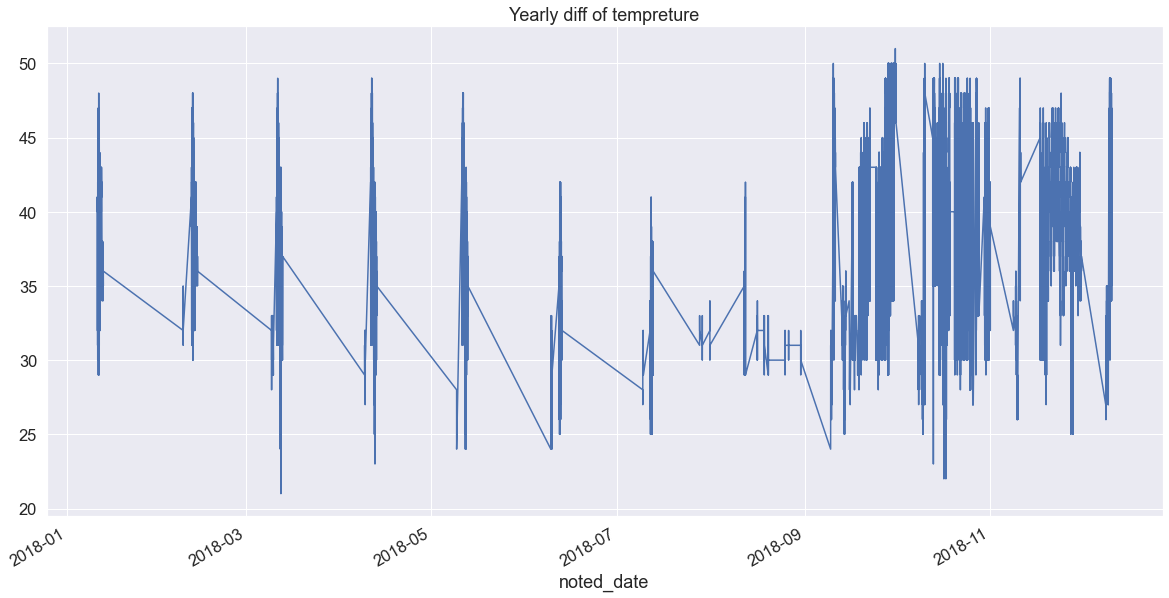

In [32]:
df["temp"].plot()
plt.title("Yearly diff of tempreture")

Text(0.5, 1.0, ' tempreture Behaviour in 2018')

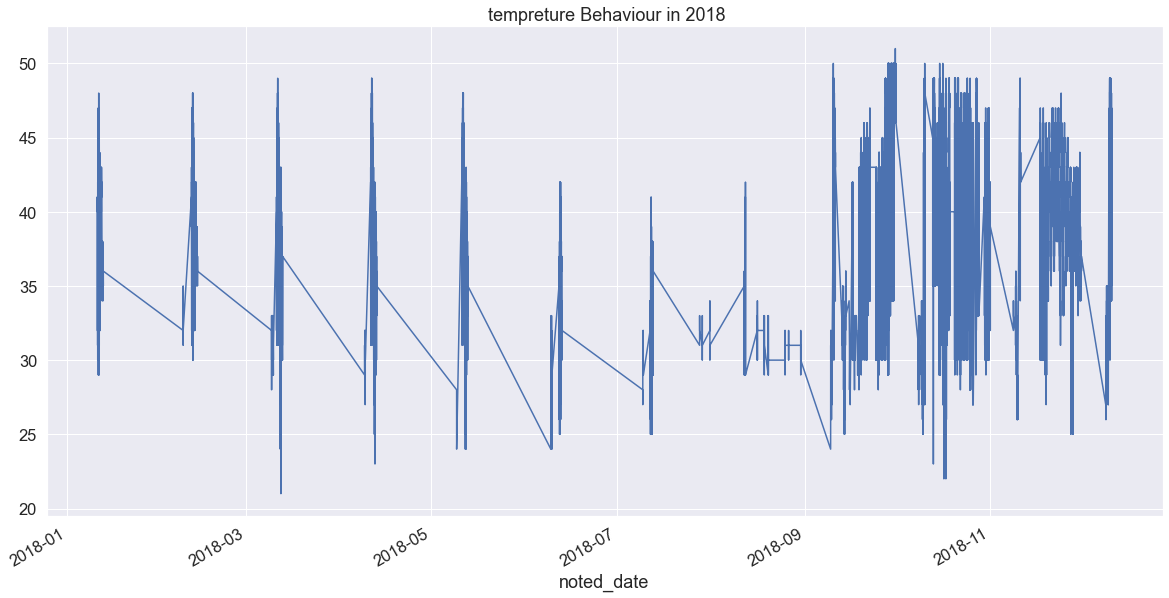

In [33]:
df.loc["2018" , "temp"].plot()
plt.title(" tempreture Behaviour in 2018")

Text(0.5, 1.0, ' tempreture Behaviour in 2018')

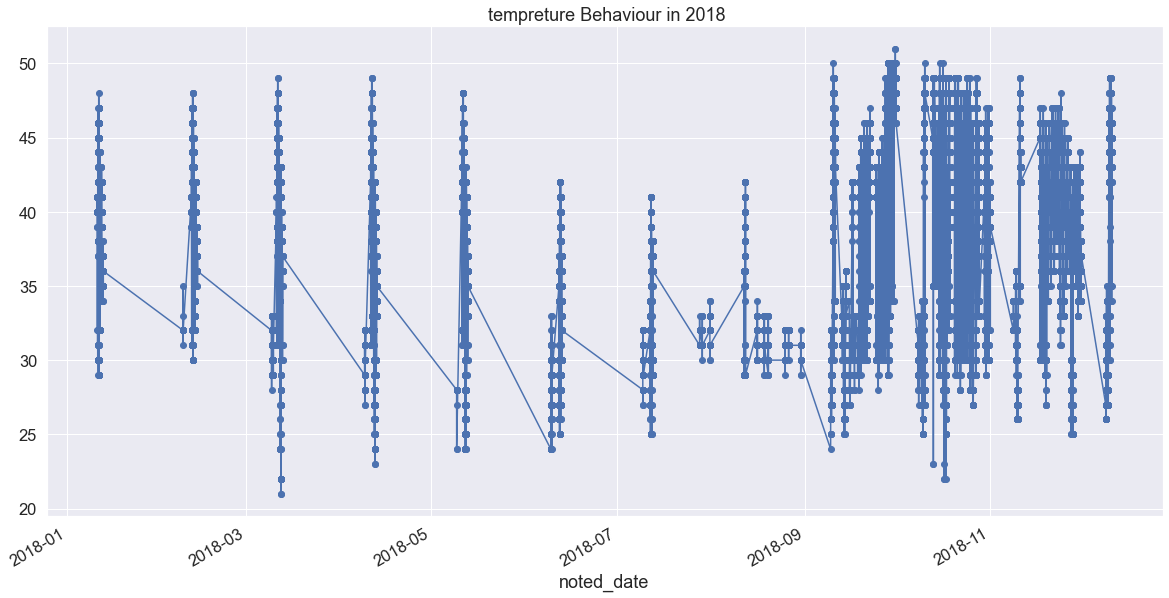

In [34]:
df.loc["2018" , "temp"].plot(marker = "o")
plt.title(" tempreture Behaviour in 2018")

In [35]:
temps = df[["temp"]]

<AxesSubplot:xlabel='noted_date'>

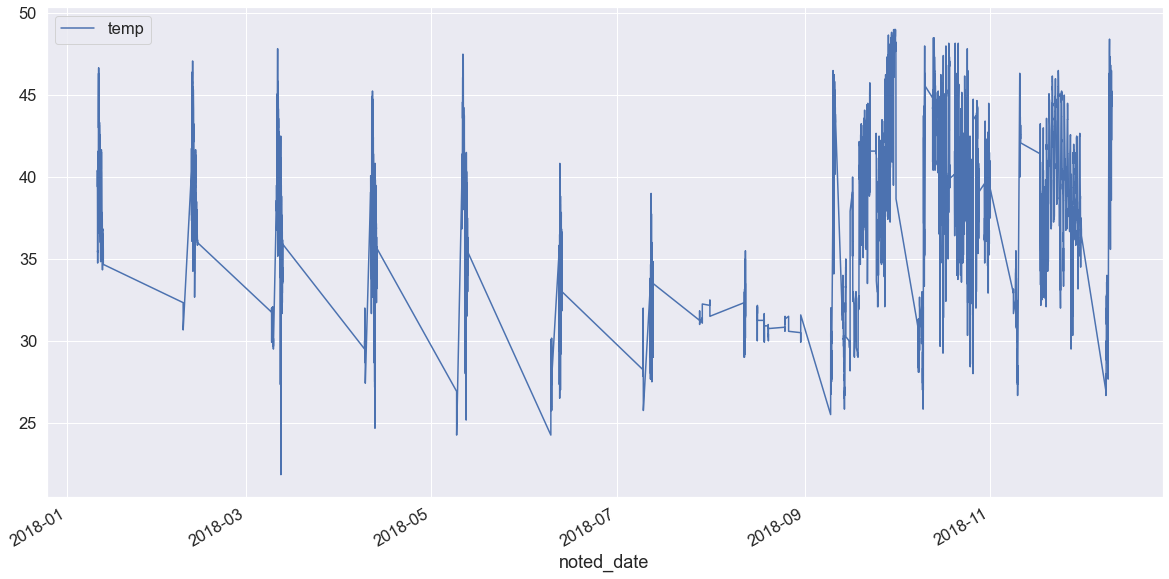

In [36]:
temps.rolling(12).mean().plot()

In [37]:
df.reset_index(inplace=True)

In [38]:
df

,noted_date,id,room_id/id,temp,out/in,Years,Moth,Day
0,2018-08-12 09:30:00,__export__.temp_log_196134_bd201015,Room Admin,29,In,2018,8,12
1,2018-08-12 09:30:00,__export__.temp_log_196131_7bca51bc,Room Admin,29,In,2018,8,12
2,2018-08-12 09:29:00,__export__.temp_log_196127_522915e3,Room Admin,41,Out,2018,8,12
3,2018-08-12 09:29:00,__export__.temp_log_196128_be0919cf,Room Admin,41,Out,2018,8,12
4,2018-08-12 09:29:00,__export__.temp_log_196126_d30b72fb,Room Admin,31,In,2018,8,12
...,...,...,...,...,...,...,...,...
97601,2018-07-28 07:07:00,__export__.temp_log_91076_7fbd08ca,Room Admin,31,In,2018,7,28
97602,2018-07-28 07:07:00,__export__.temp_log_147733_62c03f31,Room Admin,31,In,2018,7,28
97603,2018-07-28 07:06:00,__export__.temp_log_100386_84093a68,Room Admin,31,In,2018,7,28
97604,2018-07-28 07:06:00,__export__.temp_log_123297_4d8e690b,Room Admin,31,In,2018,7,28


In [39]:
# get escribtion report of data ::
profile = pp.ProfileReport(df , title = "IOT-Temp-Report" , explorative=True)
profile.to_widgets()


Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
# To save report as html file
profile.to_file("IOT-Temp_data_Report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<p id = "ETl">ETL-Process</p>

#  ETL :: (Extract Transform Load) ::
**********************

* Its one of the most important phase in the data scientist life cycle which ::
    * Feature_Engineering Process.
        * Extract New Usefull Features from old useless Feature which not enough to Trian Model.
    * Transform data.
        * Data in the real state not come cleaned it comes Dirty data includes.
            * non_Logic_data_values.
            * Noisy and Errors Values.
            * Missig_data_Values.
            * Duplicatiers and Reapet data.
            * Outliers data_Values.
            * Categorical_Text_data.

# 1 :: Feature_Engineering Technice ::



* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [41]:
df

,noted_date,id,room_id/id,temp,out/in,Years,Moth,Day
0,2018-08-12 09:30:00,__export__.temp_log_196134_bd201015,Room Admin,29,In,2018,8,12
1,2018-08-12 09:30:00,__export__.temp_log_196131_7bca51bc,Room Admin,29,In,2018,8,12
2,2018-08-12 09:29:00,__export__.temp_log_196127_522915e3,Room Admin,41,Out,2018,8,12
3,2018-08-12 09:29:00,__export__.temp_log_196128_be0919cf,Room Admin,41,Out,2018,8,12
4,2018-08-12 09:29:00,__export__.temp_log_196126_d30b72fb,Room Admin,31,In,2018,8,12
...,...,...,...,...,...,...,...,...
97601,2018-07-28 07:07:00,__export__.temp_log_91076_7fbd08ca,Room Admin,31,In,2018,7,28
97602,2018-07-28 07:07:00,__export__.temp_log_147733_62c03f31,Room Admin,31,In,2018,7,28
97603,2018-07-28 07:06:00,__export__.temp_log_100386_84093a68,Room Admin,31,In,2018,7,28
97604,2018-07-28 07:06:00,__export__.temp_log_123297_4d8e690b,Room Admin,31,In,2018,7,28


* We acually apply that techniqe to generate years , months and days from Date feature.

# 2 :: Transform_data ::

* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

In [42]:
# identify non_logic data values , Noisy and Errors::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (noted_date)

The Col _ (noted_date) _Unique_values :: ['2018-08-12T09:30:00.000000000' '2018-08-12T09:29:00.000000000'
 '2018-08-12T09:28:00.000000000' ... '2018-07-28T07:08:00.000000000'
 '2018-07-28T07:07:00.000000000' '2018-07-28T07:06:00.000000000']

The Col _ (noted_date)_Value_counts :: 

2018-12-09 03:09:00    65
2018-09-09 16:24:00    62
2018-09-09 17:31:00    53
2018-11-09 19:42:00    50
2018-09-09 16:08:00    50
                       ..
2018-09-21 06:07:00     1
2018-09-16 14:19:00     1
2018-02-11 12:28:00     1
2018-05-11 07:04:00     1
2018-10-25 09:29:00     1
Name: noted_date, Length: 27920, dtype: int64

-----------
-----------

The Col :: (id)

The Col _ (id) _Unique_values :: ['__export__.temp_log_196134_bd201015'
 '__export__.temp_log_196131_7bca51bc'
 '__export__.temp_log_196127_522915e3' ...
 '__export__.temp_log_100386_84093a68'
 '__export__.temp_log_123297_4d8e690b'
 '__export__.temp_log_133741_32958703']

The Col _ (id)_Value_counts :: 

__export__.

* From the data above we can see that data not include non_logic data values.

In [43]:
# identify duplicates in data ::
df.duplicated().sum()
# Remove duplictes in data ::
df.drop_duplicates(inplace=True)

In [44]:
 # to identify missing data values ::
Num_Missing_data   = df.isnull().sum().sort_values(ascending = False)
Precentage_Missing = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
MISSIng =pd.concat([Num_Missing_data , Precentage_Missing] , axis=1 , keys=["Num_Missing" , "Presentage_Missing"])
MISSIng


,Num_Missing,Presentage_Missing
noted_date,0,0.0
id,0,0.0
room_id/id,0,0.0
temp,0,0.0
out/in,0,0.0
Years,0,0.0
Moth,0,0.0
Day,0,0.0


<AxesSubplot:>

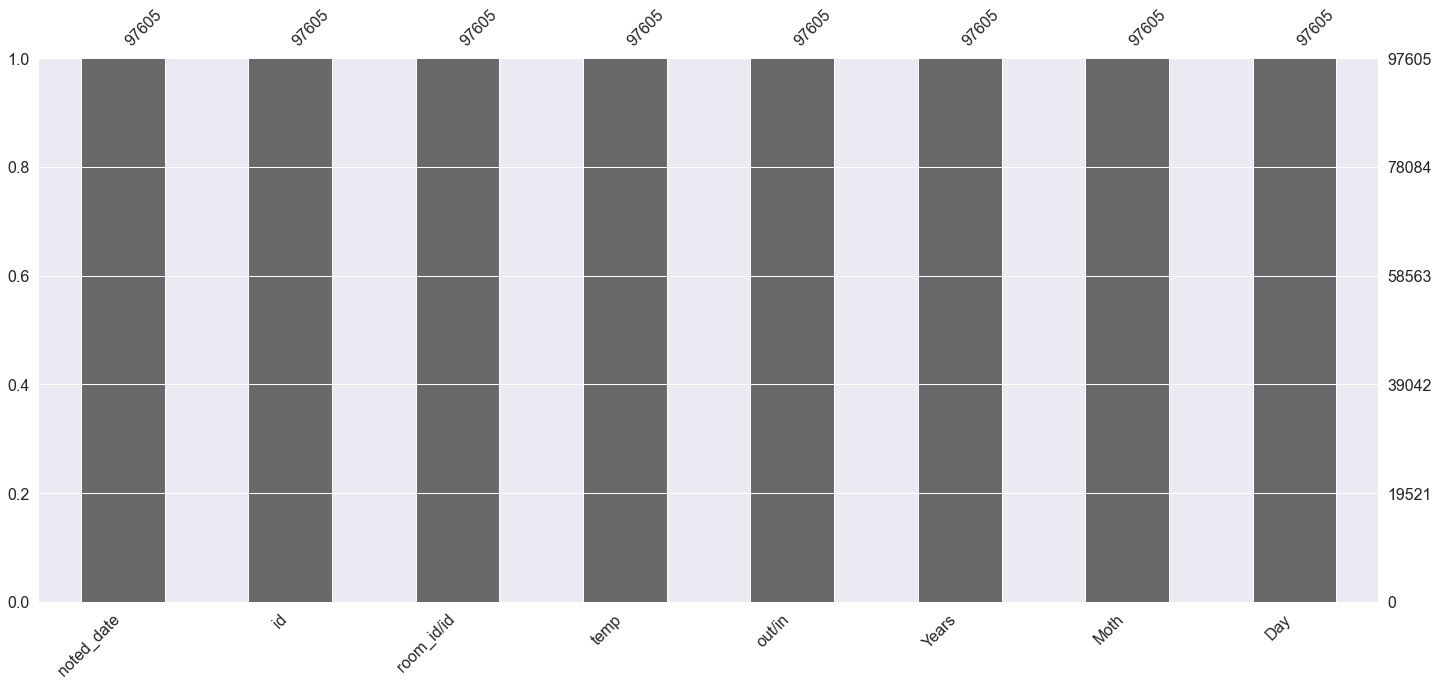

In [45]:
# Visualize missing data values ::
mno.bar(df)

* From the result above we can see that data not include Missing data values.

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.



<AxesSubplot:ylabel='temp'>

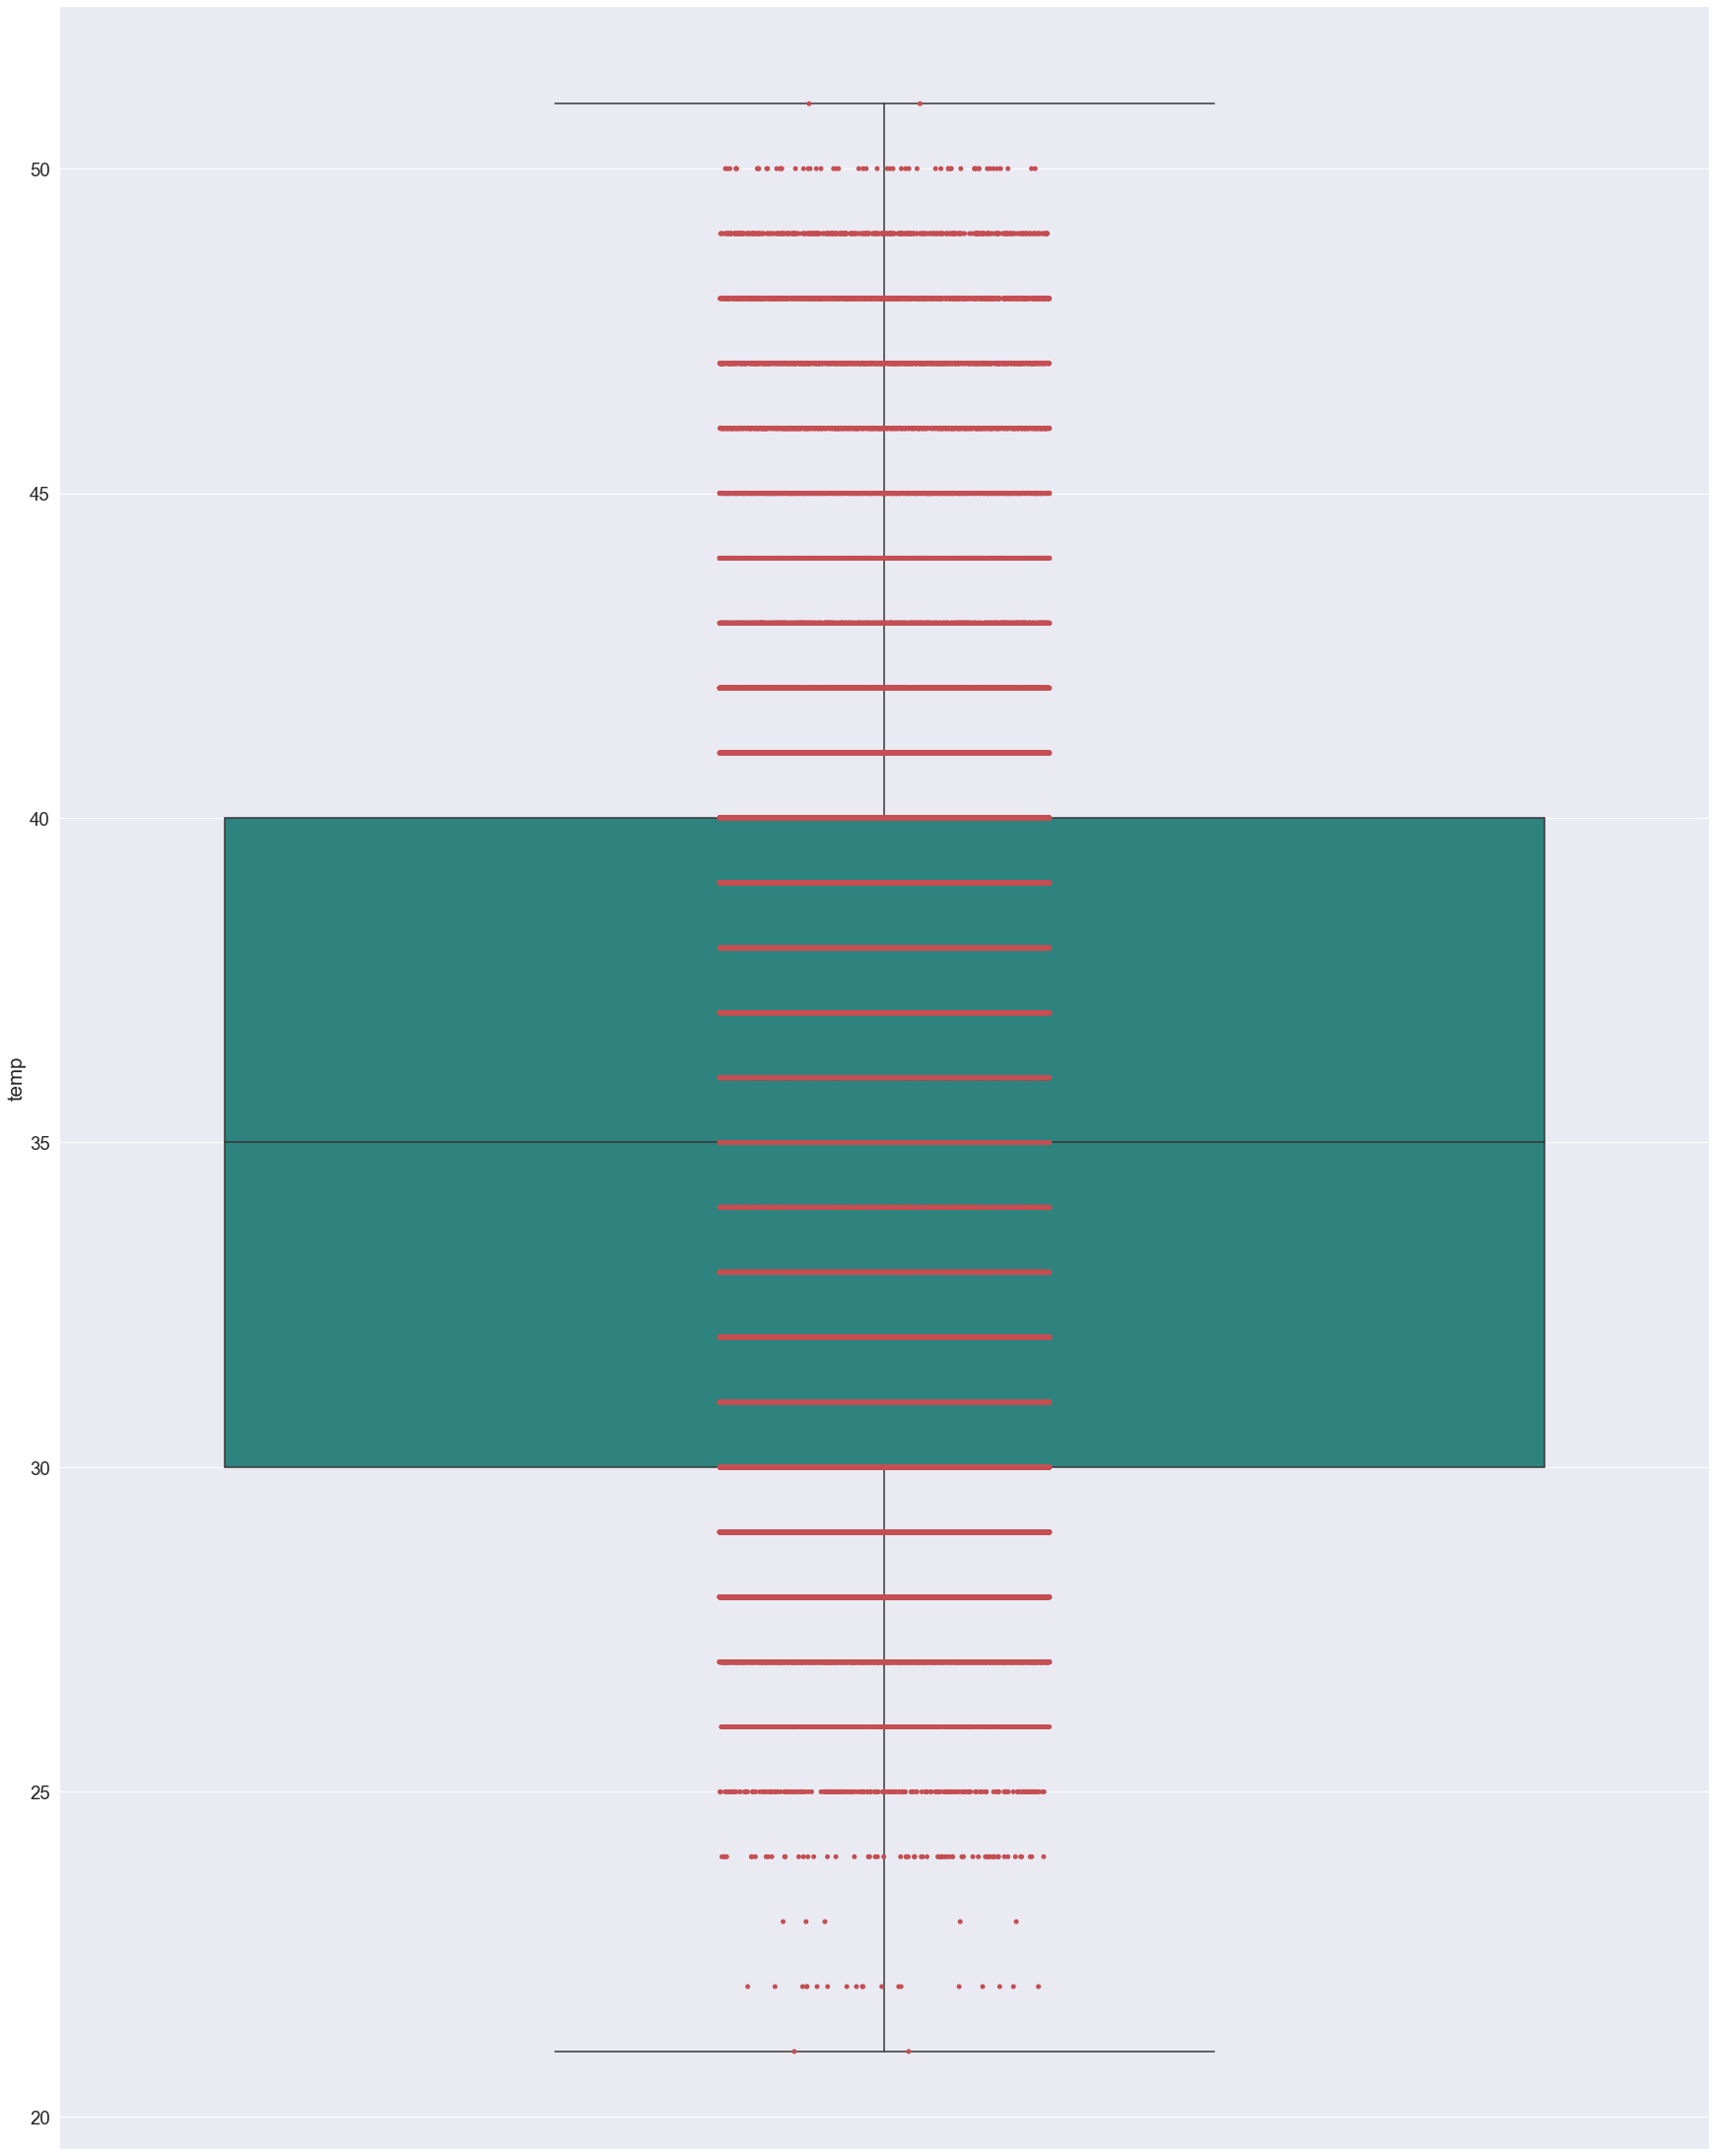

In [46]:
sns.set(rc = {"figure.figsize" : [30,40]} , font_scale = 1.7)
sns.boxplot  (y = "temp" , data = df , palette="viridis")
sns.stripplot(y = "temp" , data = df , color = "r")

* From the result above we can see tha data not include outliers data values

<AxesSubplot:>

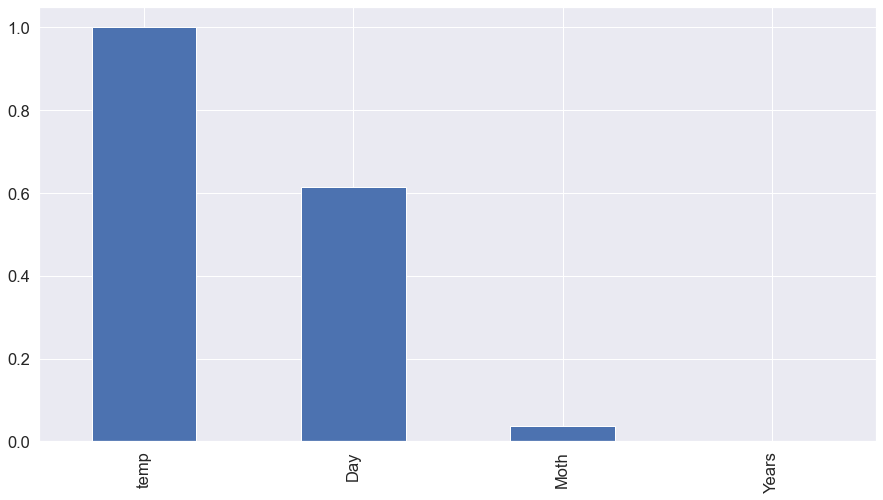

In [47]:
#Get Correlation of "Churn" with other variables:
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

plt.figure(figsize=(15,8))
df.corr()['temp'].sort_values(ascending = False).plot(kind='bar'  )

<p id = "Prepration">Data-Prepration</p>

In [48]:
df["out/in"] = df["out/in"].apply(lambda x : 0 if x == "Out" else 1 )


In [49]:
#  Split data into input data and output data
x = df["temp"].values
y = df["out/in"]

In [50]:
x = x.reshape(-1,1)


In [51]:
# Spliting data into Training and Testing data ::
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 20 , test_size=0.2)

In [52]:
#Scalling data ::
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

<p id = "Model">Bulid_ML_Model</p>

# Build Models ::
*************************************
* On that Process we will ::
    * Bulid multi models fror classification problem.
    * Evaluate all models.
    * Select the most efficient model for churn problem.

In [53]:
# Import All Classification Algos ::
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.metrics import classification_report , f1_score , precision_recall_curve

In [54]:
Models = {"Log_Classifer" : LogisticRegression() ,
          "DT_Classifer"  : DecisionTreeClassifier() ,
          "RF_Classifer"  : RandomForestClassifier() ,
          "XGB_Classifer" : XGBClassifier() ,
          "SVC_Classifer" : SVC(),
          "GassianNB_Classifiier" : GaussianNB() ,
          "KNN_Classifier" : KNeighborsClassifier()
         }

In [55]:
for Name , Model in Models.items() :
    print(f"The Model :: {Name}\n----------")
    Model.fit(x_train , y_train)
    Train_score = Model.score(x_train , y_train)
    Test_score  = Model.score(x_test , y_test)
    y_pred = Model.predict(x_test)
    Acurace_Score = accuracy_score(y_test , y_pred)
    Con_Matrix = confusion_matrix(y_test , y_pred)
    print(f"The Traing_Score :: {Train_score}\nThe Testing_Score :: {Test_score}\nThe Accuracy_Scor :: {Acurace_Score}\nThe Con_Matrix ::\n {Con_Matrix}\n=================\n=================")

The Model :: Log_Classifer
----------
The Traing_Score :: 0.7715280979458019
The Testing_Score :: 0.7685057117975513
The Accuracy_Scor :: 0.7685057117975513
The Con_Matrix ::
 [[14636   786]
 [ 3733   366]]
The Model :: DT_Classifer
----------
The Traing_Score :: 0.8134316889503611
The Testing_Score :: 0.8106654372214538
The Accuracy_Scor :: 0.8106654372214538
The Con_Matrix ::
 [[14978   444]
 [ 3252   847]]
The Model :: RF_Classifer
----------
The Traing_Score :: 0.8134316889503611
The Testing_Score :: 0.8106654372214538
The Accuracy_Scor :: 0.8106654372214538
The Con_Matrix ::
 [[14978   444]
 [ 3252   847]]
The Model :: XGB_Classifer
----------
[12:51:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Traing_Score :: 0.81343168895

* Select most efficient model with high Performance and accuracy

In [56]:
XGB_Model = XGBClassifier()
XGB_Model.fit(x_train , y_train)
print(XGB_Model.score(x_train , y_train))
print(XGB_Model.score(x_test , y_test))
print("-" * 80)

[13:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8134316889503611
0.8106654372214538
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

# Evaluate Model ::
*********************************
* Its one off the most important phase in data scientist life cycle which estimate the performance and accuracy of the model in that problem.

In [57]:
XGB_Model.score(x_train , y_train)

0.8134316889503611

In [58]:
XGB_Model.score(x_test , y_test)

0.8106654372214538

In [59]:
Ac_Sore_RF = accuracy_score(y_test , y_pred)
Ac_Sore_RF

0.7900210030223862

In [60]:
con_Matrix = confusion_matrix(y_test , y_pred)
con_Matrix

array([[13785,  1637],
       [ 2462,  1637]], dtype=int64)

<AxesSubplot:>

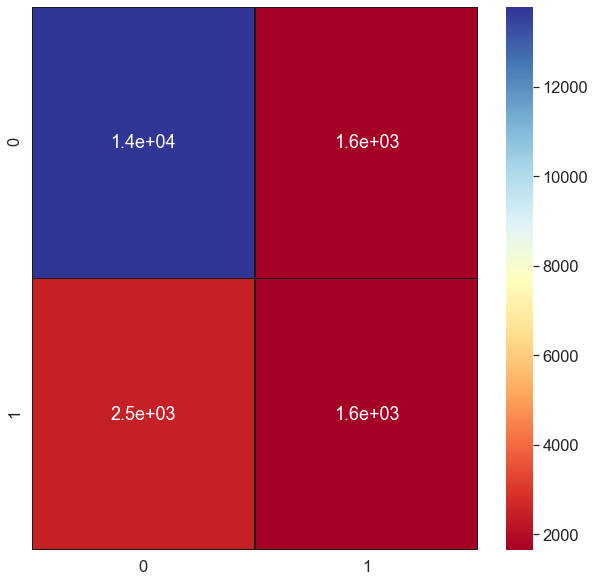

In [61]:
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

sns.heatmap(con_Matrix , annot = True , cmap="RdYlBu" , linecolor = 'k' , linewidths= 1)

<p id = "Save">Save_Model</p>

# Save techinces ::
***************************************
* Save Scaler
* Save PCA
* Save Model

In [62]:
import joblib

In [63]:
scaler = joblib.dump(scaller , "scaler.h5")

In [64]:
Model = joblib.dump(XGB_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Conclusion ::
*****************************
* On that Step We will ::
  * Input data features.
  * Scaling input data.
  * Predict in/out label.

In [65]:
df

,noted_date,id,room_id/id,temp,out/in,Years,Moth,Day
0,2018-08-12 09:30:00,__export__.temp_log_196134_bd201015,Room Admin,29,1,2018,8,12
1,2018-08-12 09:30:00,__export__.temp_log_196131_7bca51bc,Room Admin,29,1,2018,8,12
2,2018-08-12 09:29:00,__export__.temp_log_196127_522915e3,Room Admin,41,0,2018,8,12
3,2018-08-12 09:29:00,__export__.temp_log_196128_be0919cf,Room Admin,41,0,2018,8,12
4,2018-08-12 09:29:00,__export__.temp_log_196126_d30b72fb,Room Admin,31,1,2018,8,12
...,...,...,...,...,...,...,...,...
97601,2018-07-28 07:07:00,__export__.temp_log_91076_7fbd08ca,Room Admin,31,1,2018,7,28
97602,2018-07-28 07:07:00,__export__.temp_log_147733_62c03f31,Room Admin,31,1,2018,7,28
97603,2018-07-28 07:06:00,__export__.temp_log_100386_84093a68,Room Admin,31,1,2018,7,28
97604,2018-07-28 07:06:00,__export__.temp_log_123297_4d8e690b,Room Admin,31,1,2018,7,28


In [66]:
x[:20]


array([[29],
       [29],
       [41],
       [41],
       [31],
       [31],
       [29],
       [29],
       [29],
       [29],
       [42],
       [29],
       [29],
       [29],
       [29],
       [41],
       [41],
       [29],
       [29],
       [42]], dtype=int64)

In [67]:
custom_data = np.array([ 29])

In [68]:
custom_data.shape

(1,)

In [69]:
custom_data = scaller.transform([custom_data])
custom_data

array([[-1.06568165]])

In [70]:
prediction = XGB_Model.predict(custom_data)
prediction

array([0], dtype=int64)